In [3]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
import scipy.stats as stats

## Geometric Dist

In [22]:
n = 10000
rnd.seed(0)
Us = rnd.rand(n)


def getGeometric(Us, p):
    t = np.log(1 - Us) / np.log(1 - p)
    Xs = np.ceil(t)
    return Xs
Xs = getGeometric(Us, 0.25)
print(Xs)

[3. 5. 4. ... 5. 1. 6.]


## 6 Point Dist

(array([0.1433, 0.109 , 0.1273, 0.0584, 0.2562, 0.3058]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 6 artists>)

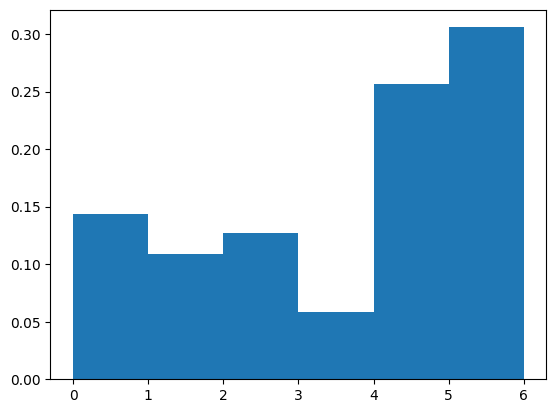

In [26]:
def directCride(ps, n):
    # Does not include a binary  seacrch
    Fs = np.cumsum(ps)
    Us = rnd.rand(n)
    Xs = np.zeros(n)
    for i in range(len(Us)):
        Xs[i] = np.argmax(Us[i] < Fs)
    return Xs

ps = np.array([7/48, 5/48, 1/8, 1/16, 1/4, 5/16])
Xs_dc = directCride(ps, 10000)
plt.hist(Xs_dc, bins=6, range=(0, 6), density=True)

## Rejection Method

0.3126 0.2508 0.0662 0.1243 0.1018 0.1443


(array([0.1443, 0.1018, 0.1243, 0.0662, 0.2508, 0.3126]),
 array([1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 6 artists>)

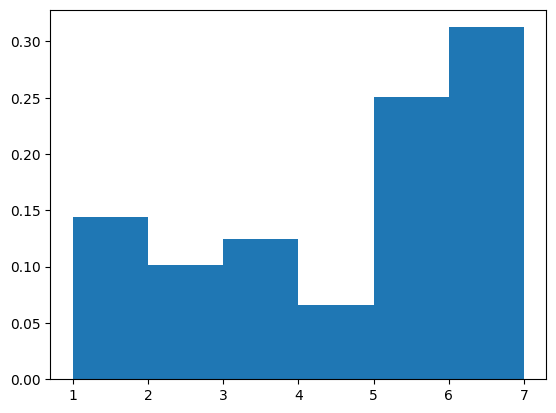

In [42]:
def rejectionMethod(ps, n):
    c = np.max(ps)
    Xs = np.zeros(n)
    k = len(ps)
    count = 0
    while count < n:
        U1 = rnd.rand()
        I = int(np.floor(k * U1))
        U2 = rnd.rand()
        if U2 <= ps[I] / c:
            Xs[count] = I
            count += 1

    return Xs + 1
Xs_reject = rejectionMethod(ps, n)
plt.hist(Xs_reject, bins=6,range = (1,7),  density=True)


## Alias

[2. 5. 5. ... 2. 5. 5.]


(array([0.1429, 0.1023, 0.128 , 0.0597, 0.251 , 0.3161]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 6 artists>)

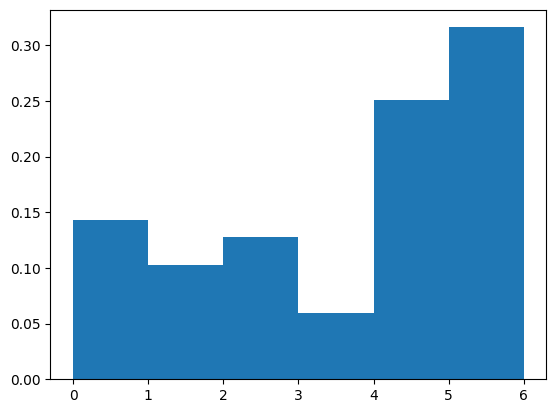

In [74]:
def getFL(ps):
    eps = 10e-5
    k = len(ps)
    L = [i for i in range(0,k)]
    Fs = k * ps
    G = np.where(Fs >= 1, True, False)
    S = np.where(Fs <= 1, True, False)
    G = np.where(G)[0]
    S = np.where(S)[0]
    while len(S) > 0:
        i = G[0]
        j = S[0]
        S = np.delete(S, 0)
        L[j] = i
        Fs[i] -= 1 - Fs[j]
        if Fs[i] < 1 - eps:
            G = np.delete(G, 0)
            S = np.append(S, i)
    return L, Fs

def alias(ps, n):
    k = len(ps)
    L, Fs = getFL(ps)
    Us = rnd.rand(n)
    Is = np.floor(k * Us)
    Xs = np.zeros(n)
    for n in range(len(Is)):
        I = int(Is[n])
        U2 = rnd.rand()
        if U2 <= Fs[I]:
            Xs[n] = I
        else:
            Xs[n] = L[I]
    return Xs
Xs_alias = alias(ps, n)
print(Xs_alias)
plt.hist(Xs_alias, range = (0, 6), density=True, bins = 6)

## Testing

### Kolmogorov Smirnov

# Continous Variables

## Exponential Insert PDF

In [ ]:
def generateExponential(lam, n = 10000):
    Us = rnd.rand(n)
    return - np.log(Us) / lam 

Xs_exp = generateExponential(0.5)
print(Xs)
plt.hist(Xs, bins = 20, density= True)

## Normal (Box Mueller)

[1.47011912e-05 1.52077866e-05 1.57308138e-05 1.62707684e-05
 1.68281599e-05 1.74035118e-05 1.79973619e-05 1.86102627e-05
 1.92427816e-05 1.98955015e-05 2.05690213e-05 2.12639557e-05
 2.19809361e-05 2.27206109e-05 2.34836457e-05 2.42707239e-05
 2.50825470e-05 2.59198350e-05 2.67833272e-05 2.76737820e-05
 2.85919779e-05 2.95387136e-05 3.05148086e-05 3.15211039e-05
 3.25584619e-05 3.36277676e-05 3.47299285e-05 3.58658754e-05
 3.70365629e-05 3.82429699e-05 3.94861001e-05 4.07669826e-05
 4.20866723e-05 4.34462506e-05 4.48468260e-05 4.62895348e-05
 4.77755411e-05 4.93060383e-05 5.08822487e-05 5.25054252e-05
 5.41768509e-05 5.58978404e-05 5.76697404e-05 5.94939300e-05
 6.13718217e-05 6.33048620e-05 6.52945318e-05 6.73423477e-05
 6.94498622e-05 7.16186645e-05 7.38503815e-05 7.61466782e-05
 7.85092587e-05 8.09398669e-05 8.34402870e-05 8.60123449e-05
 8.86579083e-05 9.13788879e-05 9.41772383e-05 9.70549585e-05
 1.00014093e-04 1.03056732e-04 1.06185014e-04 1.09401124e-04
 1.12707297e-04 1.161058

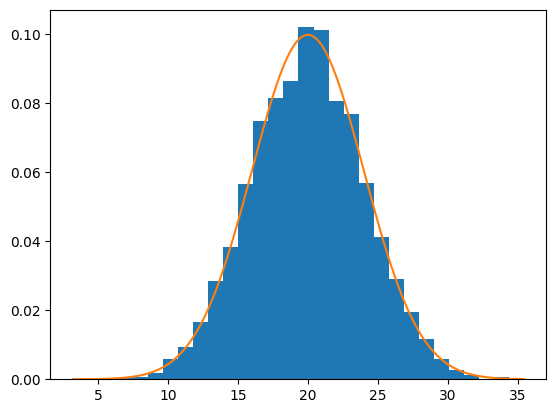

In [107]:
def unifab(a,b, n = 10000):
    Us = rnd.rand(n)
    Xs = a + (b - a) * Us
    return Xs

def generateTrig(n = 10000):
    Vs1 = np.zeros(n)
    Vs2 = Vs1
    for i in range(len(Vs1)):
        while True:
            V1 = unifab(-1, 1, 1)
            V2 = unifab(-1, 1, 1)
            Rsq = V1**2 + V2**2
            if  Rsq <= 1:
                break
        Vs1[i] = V1 / np.sqrt(Rsq)
        Vs2[i] = V2 / np.sqrt(Rsq)
    return Vs1 , Vs2 

def generateNorm(mu, sigma, n = 10000):
    cos, sin = generateTrig(int(np.ceil(n / 2)))
    U1s = rnd.rand(int(np.ceil(n / 2)))
    cs = np.sqrt(-2 * np.log(U1s))
    Z1s = cs * cos
    Z2s = cs * sin
    Zs = np.append(Z1s, Z2s)
    Zs = Zs[:n-1]
    return Zs * sigma + mu

mu = 20
sigma = 4
Zs = generateNorm(mu,sigma, 10000)
xs = np.linspace(np.min(Zs), np.max(Zs), 1000)
ys = stats.norm.pdf(xs, loc = mu, scale = sigma)
print(ys)
plt.hist(Zs, bins = 30, density= True)
plt.plot(xs, ys)
plt.show()

## Pareto

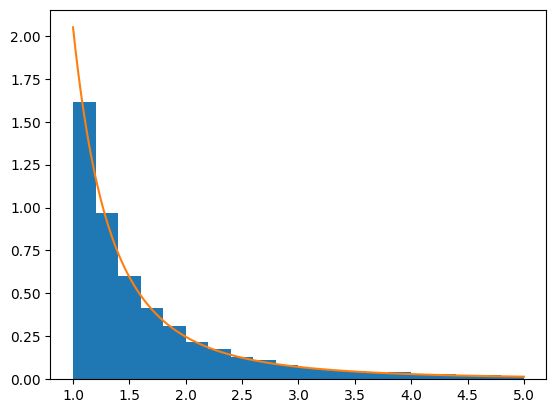

In [122]:
def generatePareto(k, beta = 1, n = 10000):
    Us = rnd.rand(n)
    return beta * (Us**(-1/k)) 
k = 2.05
Xs_Pareto = generatePareto(k)
cut = 5
plt.hist(Xs_Pareto[Xs_Pareto < cut], bins = 20, density= True)
xs = np.linspace(1, cut, 1000)
ys = k * 1**k / (xs**(k+1))
plt.plot(xs, ys)
plt.show()

## Applying Kolmogorov-Smirnov Test for the Three

# Exercise 2
Comparing mean and variance for the Pareto distribution

In [170]:
ks = [2.01, 2.05, 2.5, 3, 4]
beta = 1
for k in ks:
    xs = generatePareto(k, beta, 100000)
    print(f"For k = {k}:")
    print(f"Simulated: Mean = {np.mean(xs):.4f}, Variance = {np.var(xs):.4f}")
    # Analytical
    analytical_mean = beta * k / (k -1)
    analytical_variance = beta**2 * k / ((k-1)**2 * (k-2))
    print(f"Analytical: Mean = {analytical_mean:.4f}, Variance = {analytical_variance:.4f} \n")

For k = 2.01:
Simulated: Mean = 2.0022, Variance = 9.6859
Analytical: Mean = 1.9901, Variance = 197.0395 

For k = 2.05:
Simulated: Mean = 1.9512, Variance = 8.6200
Analytical: Mean = 1.9524, Variance = 37.1882 

For k = 2.5:
Simulated: Mean = 1.6758, Variance = 2.4172
Analytical: Mean = 1.6667, Variance = 2.2222 

For k = 3:
Simulated: Mean = 1.5029, Variance = 0.7418
Analytical: Mean = 1.5000, Variance = 0.7500 

For k = 4:
Simulated: Mean = 1.3357, Variance = 0.2248
Analytical: Mean = 1.3333, Variance = 0.2222 



The $k-2$ part in the denominator causes the analytical variance to go towards $\infty$

# Exercise 3
For the normal distribution generate 100 95%